In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
!pip install -r """/content/drive/MyDrive/LSM_upgrad_case study/requirements.txt"""

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visualizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import warnings
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
warnings.filterwarnings("ignore")

In [22]:
train = pd.read_csv("/content/drive/MyDrive/LSM_upgrad_case study/train.csv")
test = pd.read_csv("/content/drive/MyDrive/LSM_upgrad_case study/test.csv")

In [23]:
print(train.shape)
print(test.shape)

(6922, 87)
(2308, 87)


In [24]:
train.drop("Unnamed: 0", axis = 1, inplace = True)
test.drop("Unnamed: 0", axis = 1, inplace = True)

In [25]:
train.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)
test.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)

In [26]:
x_train = train.drop("Converted", axis = 1)
y_train = train.iloc[:, -1]
x_test = test.drop("Converted", axis = 1)
y_test = test.iloc[:, -1]

In [27]:
pd.set_option('display.max_columns', 500)

In [28]:
x_train.head()

,Tags_Will revert after reading the email,Total Time Spent on Website,Lead Profile_Potential Lead,Last Notable Activity_SMS Sent,What is your current occupation_Working Professional,Lead Origin_Lead Add Form,Tags_Interested in other courses,Last Activity_SMS Sent,Lead Profile_Unspecified,What is your current occupation_Unemployed,Tags_Ringing,Lead Source_Reference,Tags_Closed by Horizzon,Last Activity_Olark Chat Conversation,Last Notable Activity_Modified,Specialization_Unspecified,Lead Source_Olark Chat,Tags_Busy,Do Not Email_Yes,Tags_switched off,Tags_In confusion whether part time or DLP,City_Other Metro Cities,A free copy of Mastering The Interview_Yes,Lead Profile_Student of SomeSchool,Specialization_Rural and Agribusiness,How did you hear about X Education_Social Media,Last Activity_Email Link Clicked,Lead Source_Welingak Website,Tags_Lost to Others,Specialization_Business Administration,Tags_Lost to EINS,Last Activity_Had a Phone Conversation,Tags_Lateral student,Lead Source_Facebook,Last Activity_Converted to Lead,TotalVisits,Last Activity_Visited Booth in Tradeshow,Lead Source_youtubechannel,Tags_Not doing further education,Specialization_IT Projects Management,Lead Source_welearnblog_Home,Tags_Interested in full time MBA,Lead Source_bing,Lead Source_Pay per Click Ads,Lead Source_Referral Sites,Last Activity_View in browser link Clicked,Specialization_Operations Management,Last Notable Activity_Email Received,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Social Media,Specialization_Supply Chain Management,Last Activity_Email Bounced,Tags_Interested in Next batch,Last Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Healthcare Management,Last Notable Activity_Unreachable,Last Notable Activity_Email Opened,How did you hear about X Education_Online Search,Tags_Diploma holder (Not Eligible),Last Activity_Form Submitted on Website,Last Notable Activity_Email Marked Spam,Tags_Shall take in the next coming month,Lead Source_Organic Search,Specialization_Marketing Management,Tags_Want to take admission but has financial problems,Last Notable Activity_Email Bounced,Tags_Recognition issue (DEC approval),Last Activity_Unreachable,Tags_invalid number,Lead Source_testone,Lead Source_Live Chat,Lead Source_Others,Lead Source_Press_Release,Last Activity_Email Marked Spam,Tags_University not recognized,Last Notable Activity_Olark Chat Conversation,Lead Source_Google,Last Notable Activity_Form Submitted on Website,Specialization_Services Excellence,What is your current occupation_Other,Lead Origin_Quick Add Form,Page Views Per Visit,City_Other Cities
0,0,0.764299,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.662118,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.651290,0
1,0,0.176841,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.172652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.794993,0
2,0,-0.157025,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.383861,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.169195,0
3,1,1.820629,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.383861,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.169195,0
4,1,-0.133308,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.172652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.794993,0


In [29]:
ct = ColumnTransformer([('se', StandardScaler(), ['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits'])], remainder='passthrough')

In [30]:
random_forest_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(random_state = 42))])
adaboost_pipeline = Pipeline([('transformer', ct), ('Adaboost', AdaBoostClassifier(random_state = 42))])
ExtraTree_pipeline = Pipeline([('transformer', ct), ('ExtraTreeClassifier', ExtraTreesClassifier(random_state = 42))])
BaggingClassifier_pipeline = Pipeline([('transformer', ct), ('BaggingClassifier', BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 42))])
GradientBoost_pipeline = Pipeline([('transformer', ct), ('GradientBoosting', GradientBoostingClassifier(random_state = 42))])
dtree_pipeline = Pipeline([('transformer', ct), ('DecisionTree', DecisionTreeClassifier(random_state = 42))])
knn_pipeline = Pipeline([('transformer', ct), ('KNN', KNeighborsClassifier())])
lr_pipeline = Pipeline([('transformer', ct), ('LogisticRegression', LogisticRegression(random_state = 42))])
sgd_pipeline = Pipeline([('transformer', ct), ('StochasticGradient', SGDClassifier(random_state = 42))])
mlp_pipeline = Pipeline([('transformer', ct), ('MLPClassifier', MLPClassifier(random_state = 42))])
naive_pipeline = Pipeline([('transformer', ct), ('NaiveBayes', GaussianNB())])
svc_pipeline = Pipeline([('transformer', ct), ('SVM', SVC(random_state = 42))])
lightgbm_pipeline = Pipeline([('transformer', ct), ('lightgbm', LGBMClassifier(random_state = 42))])
catboost_pipeline = Pipeline([('transformer', ct), ('CatBoost', CatBoostClassifier(random_state = 42, silent = True))])
xgboost_pipeline = Pipeline([('transformer', ct), ('XGBoost', XGBClassifier(random_state = 42))])

In [31]:
pipeline_list = [random_forest_pipeline, adaboost_pipeline, ExtraTree_pipeline, BaggingClassifier_pipeline, GradientBoost_pipeline,
                dtree_pipeline, knn_pipeline, lr_pipeline, sgd_pipeline, mlp_pipeline, naive_pipeline, svc_pipeline,
                lightgbm_pipeline, catboost_pipeline, xgboost_pipeline]

In [32]:
pipe_dict = {0: "RandomForest", 1: "Adaboost", 2: "ExtraTree", 3: "BaggingClassifier", 4: "GradientBoosting", 5: "DecisionTree",
            6: "KNN", 7: "Logistic", 8: "SGD Classifier", 9: "MLPClassifier", 10: "NaiveBayes",
            11: "SVM", 12: "LightGBM", 13: "Catboost", 14: "XGBoost"}

In [33]:
for idx, pipe in enumerate(pipeline_list):
    score = cross_val_score(pipe, x_train, y_train, cv = 10, scoring = 'accuracy')
    print(pipe_dict[idx], ":", score.mean())

RandomForest : 0.9110080991583882
Adaboost : 0.9072502481462019
ExtraTree : 0.9024837558074552
BaggingClassifier : 0.9092748292170258
GradientBoosting : 0.915919100167655
DecisionTree : 0.8829828007573672
KNN : 0.8839916506101476
Logistic : 0.9050859545079198
SGD Classifier : 0.9024837558074552
MLPClassifier : 0.9046515943914788
NaiveBayes : 0.8546597269140621
SVM : 0.9167878204005371
[LightGBM] [Info] Number of positive: 2389, number of negative: 3840
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 470
[LightGBM] [Info] Number of data points in the train set: 6229, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383529 -> initscore=-0.474597
[LightGBM] [Info] Start training from score -0.474597
[LightGBM] [Info] Number of positive: 2389, number of nega

Based on the above results, we will be choosing the **RandomForest Classifier, GradientBoosting, LightGBM & Catboost** on which we are going to test the other metrics to see in depth performance of these 4 models based on several different metrics to choose the best model for our analysis.

In [34]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    predict_train_y = model.predict(x_train)
    predict_test_y = model.predict(x_test)

    print("**Accuracy Score**")
    train_accuracy = accuracy_score(y_train, predict_train_y)
    test_accuracy = accuracy_score(y_test, predict_test_y)
    print("Train Accuracy is: %s"%(train_accuracy))
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")

    print("\n**Accuracy Error**")
    train_error = (1-train_accuracy)
    test_error = (1-test_accuracy)
    print("Train Error: %s"%(train_error))
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")

    print("\n**Classification Report**")
    train_cf_report = pd.DataFrame(classification_report(y_train, predict_train_y, output_dict = True))
    test_cf_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
    print("Train Classification Report:")
    print(train_cf_report)
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")

    print("\n**Confusion Matrix**")
    train_conf = confusion_matrix(y_train, predict_train_y)
    test_conf = confusion_matrix(y_test, predict_test_y)
    print("Train Confusion Matrix Report:")
    print((train_conf))
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

### RANDOM FOREST CLASSIFIER

In [35]:
rforest = RandomForestClassifier(random_state= 42)

In [36]:
evaluate_model(rforest, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9852643744582491

Test Accuracy is: 0.908578856152513
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.014735625541750896

Test Error: 0.09142114384748701
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.980836     0.992667  0.985264     0.986751      0.985374
recall        0.995547     0.968738  0.985264     0.982143      0.985264
f1-score      0.988137     0.980557  0.985264     0.984347      0.985229
support    4267.000000  2655.000000  0.985264  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.901210    0.921951  0.908579     0.911580      0.909325
recall        0.954448    0.837209  0.908579     0.895829      0.908579
f1-score      0.927065    0.877539  

### GRADIENT BOOSTING CLASSIFIER

In [ ]:
GradientBoost = GradientBoostingClassifier(random_state = 42)

In [ ]:
evaluate_model(GradientBoost, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9173502553784244

Test Accuracy is: 0.9165763813651138
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.0826497446215756

Test Error: 0.08342361863488623
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.907143     0.936311   0.91735     0.921727      0.918461
recall        0.963581     0.844436   0.91735     0.904008      0.917350
f1-score      0.934511     0.888003   0.91735     0.911257      0.916465
support    3954.000000  2507.000000   0.91735  6461.000000   6461.000000

 Test Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.913745     0.921811  0.916576     0.917778      0.916806
recall        0.955763     0.852521  0.916576     0.904142      0.916576
f1-score      0.934282     0.88581

### LIGHTGBM CLASSIFIER

In [ ]:
lgbm = LGBMClassifier(random_state=42)

In [ ]:
evaluate_model(lgbm, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9458288190682557

Test Accuracy is: 0.9154929577464789
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.054171180931744334

Test Error: 0.08450704225352113
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.941234     0.953723  0.945829     0.947479      0.946080
recall        0.972180     0.904268  0.945829     0.938224      0.945829
f1-score      0.956457     0.928337  0.945829     0.942397      0.945546
support    3954.000000  2507.000000  0.945829  6461.000000   6461.000000

 Test Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.921112     0.905660  0.915493     0.913386      0.915247
recall        0.944703     0.867745  0.915493     0.906224      0.915493
f1-score      0.932759     0.886

### CATBOOST CLASSIFIER

In [ ]:
catboost_classif = CatBoostClassifier(random_state=42, silent = True)

In [ ]:
evaluate_model(catboost_classif, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9405664757777434

Test Accuracy is: 0.92018779342723
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.05943352422225656

Test Error: 0.07981220657277
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.934307     0.951510  0.940566     0.942908      0.940982
recall        0.971168     0.892302  0.940566     0.931735      0.940566
f1-score      0.952381     0.920955  0.940566     0.936668      0.940187
support    3954.000000  2507.000000  0.940566  6461.000000   6461.000000

 Test Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.920742     0.919192  0.920188     0.919967      0.920154
recall        0.953434     0.865842  0.920188     0.909638      0.920188
f1-score      0.936803     0.891720  0

## Models Evaluation & Performance Benchmarking

Analysis Summary:

A) Model Accuracy:
1. **Random Forest:**
   - Train Accuracy: 98.47%
   - Test Accuracy: 91.69%

2. **Gradient Boosting:**
   - Train Accuracy: 91.74%
   - Test Accuracy: 91.66%

3. **LightGBM:**
   - Train Accuracy: 94.58%
   - Test Accuracy: 91.55%

4. **CatBoost:**
   - Train Accuracy: 94.05%
   - Test Accuracy: 92.02%

B) Model Precision:
1. **Random Forest:**
   - Train Precision (Class 0): 97.95%
   - Train Precision (Class 1): 99.30%
   - Test Precision (Class 0): 91.84%
   - Test Precision (Class 1): 91.42%

2. **Gradient Boosting:**
   - Train Precision (Class 0): 90.71%
   - Train Precision (Class 1): 93.63%
   - Test Precision (Class 0): 91.37%
   - Test Precision (Class 1): 92.18%

3. **LightGBM:**
   - Train Precision (Class 0): 94.12%
   - Train Precision (Class 1): 95.37%
   - Test Precision (Class 0): 92.11%
   - Test Precision (Class 1): 90.56%

4. **CatBoost:**
   - Train Precision (Class 0): 93.43%
   - Train Precision (Class 1): 95.15%
   - Test Precision (Class 0): 92.07%
   - Test Precision (Class 1): 91.91%

C) F1-Score:
1. **Random Forest:**
   - Train F1-Score (Class 0): 98.75%
   - Train F1-Score (Class 1): 97.99%
   - Test F1-Score (Class 0): 93.42%
   - Test F1-Score (Class 1): 88.73%

2. **Gradient Boosting:**
   - Train F1-Score (Class 0): 93.45%
   - Train F1-Score (Class 1): 88.80%
   - Test F1-Score (Class 0): 93.42%
   - Test F1-Score (Class 1): 88.58%

3. **LightGBM:**
   - Train F1-Score (Class 0): 95.64%
   - Train F1-Score (Class 1): 92.83%
   - Test F1-Score (Class 0): 93.27%
   - Test F1-Score (Class 1): 88.62%

4. **CatBoost:**
   - Train F1-Score (Class 0): 95.23%
   - Train F1-Score (Class 1): 92.09%
   - Test F1-Score (Class 0): 93.68%
   - Test F1-Score (Class 1): 89.17%

The analysis emphasizes the trade-offs between training and testing performance for each model. Further optimization and hyperparameter tuning are recommended, with a focus on Random Forest and CatBoost models for enhanced results.

### Random Forest Hyperparameter Tuning

In [37]:
new_pipeline = Pipeline([('transformer', ct), ('classifier', RandomForestClassifier(random_state=42))])

In [38]:
rf_param_grid = [{
                'classifier': [RandomForestClassifier()],
                'classifier__n_estimators': np.arange(100,2000, 200),
                'classifier__max_depth': [None, 10, 20, 30, 50, 70, 80, 100],
                'classifier__min_samples_split': [2, 3, 5, 7, 10],
                'classifier__min_samples_leaf': [1,2,3,4,5,],
                'classifier__max_features': ['auto', 'sqrt', 'log2'],
                'classifier__bootstrap': [True, False]
               }]

In [39]:
random_search = RandomizedSearchCV(estimator = new_pipeline, param_distributions = rf_param_grid, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

In [40]:
best_rf_model = random_search.fit(x_train, y_train)

In [41]:
best_rf_model.best_params_

{'classifier__n_estimators': 100,
 'classifier__min_samples_split': 10,
 'classifier__min_samples_leaf': 3,
 'classifier__max_features': 'auto',
 'classifier__max_depth': 100,
 'classifier__bootstrap': True,
 'classifier': RandomForestClassifier(max_depth=100, max_features='auto', min_samples_leaf=3,
                        min_samples_split=10)}

In [42]:
print("Best Score: %s" %(best_rf_model.best_score_))

Best Score: 0.914330964475473


In [43]:
best_rf_model.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=100, max_features='auto',
                                        min_samples_leaf=3,
                                        min_samples_split=10))])

In [44]:
rf_classif_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto', bootstrap = False, max_depth = None, random_state = 42))])

In [45]:
rf_classif_pipeline.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('RandomForest',
                 RandomForestClassifier(bootstrap=False, max_features='auto',
                                        min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [46]:
rf_test_prediction = rf_classif_pipeline.predict(x_test)

In [47]:
rf_test_prob = rf_classif_pipeline.predict_proba(x_test)

In [48]:
accuracy_score(y_test, rf_test_prediction)

0.9107452339688041

In [49]:
def check_metric(y_test, y_predict):

    print("**Accuracy Score**")
    test_accuracy = accuracy_score(y_test, y_predict)
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")

    print("\n**Accuracy Error**")
    test_error = (1-test_accuracy)
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")

    print("\n**Classification Report**")
    test_cf_report = pd.DataFrame(classification_report(y_test, y_predict, output_dict = True))
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")

    print("\n**Confusion Matrix**")
    test_conf = confusion_matrix(y_test, y_predict)
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

In [50]:
check_metric(y_test, rf_test_prediction)

**Accuracy Score**

Test Accuracy is: 0.9107452339688041
---------------------------------------------------------

**Accuracy Error**

Test Error: 0.08925476603119586
---------------------------------------------------------

**Classification Report**

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.904794    0.921403  0.910745     0.913098      0.911292
recall        0.953737    0.843854  0.910745     0.898795      0.910745
f1-score      0.928621    0.880925  0.910745     0.904773      0.909960
support    1405.000000  903.000000  0.910745  2308.000000   2308.000000
---------------------------------------------------------

**Confusion Matrix**

 Test Confusion Matrix Report:
[[1340   65]
 [ 141  762]]


### Cat Boost Hyperparameter Tuning

In [51]:
cb_new_pipeline = Pipeline([('transformer', ct), ('classifier', CatBoostClassifier(random_state=42, task_type = 'CPU', silent = True, eval_metric = 'accuracy'))])

In [52]:
catboost_params = [{
    'classifier': [CatBoostClassifier()],
    'classifier__iterations': [10],
    'classifier__learning_rate': [0.0001, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'classifier__depth': [2,4,6,8,10,12],
    'classifier__l2_leaf_reg': [2,3,5,7,9,11,12,15,18,20,25,27],
    'classifier__random_strength': [1],
    'classifier__border_count': [50, 100, 150, 200, 254],
}]

In [53]:
cb_random_search = RandomizedSearchCV(estimator = cb_new_pipeline, param_distributions = catboost_params, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

In [54]:
cb_random_search.fit(x_train, y_train)

0:	learn: 0.3794691	total: 6.72ms	remaining: 60.5ms
1:	learn: 0.2820054	total: 72.8ms	remaining: 291ms
2:	learn: 0.2472393	total: 120ms	remaining: 280ms
3:	learn: 0.2336041	total: 186ms	remaining: 278ms
4:	learn: 0.2221862	total: 238ms	remaining: 238ms
5:	learn: 0.2171146	total: 285ms	remaining: 190ms
6:	learn: 0.2106276	total: 331ms	remaining: 142ms
7:	learn: 0.2058002	total: 378ms	remaining: 94.5ms
8:	learn: 0.2014514	total: 425ms	remaining: 47.2ms
9:	learn: 0.1979243	total: 477ms	remaining: 0us


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('se',
                                                                               StandardScaler(),
                                                                               ['Total '
                                                                                'Time '
                                                                                'Spent '
                                                                                'on '
                                                                                'Website',
                                                                                'Page '
                                                                                'Views '
                                                                                'Per '
                                                                                'Visit',
                                                                                'TotalVisits'])])),
                                             ('classifier',
                                              <catboost.core.CatBoostClassifier object at 0x7cf403511270>)]),
                   n_jobs=-1,
                   param_distributions=[{'classifier': [<catb...fier object at 0x7cf402c4fca0>],
                                         'classifier__border_count': [50, 100,
                                                                      150, 200,
                                                                      254],
                                         'classifier__depth': [2, 4, 6, 8, 10,
                                                               12],
                                         'classifier__iterations': [10],
                                         'classifier__l2_leaf_reg': [2, 3, 5, 7,
                                                                     9, 11, 12,
                                                                     15, 18, 20,
                                                                     25, 27],
                                         'classifier__learning_rate': [0.0001,
                                                                       0.001,
                                                                       0.003,
                                                                       0.005,
                                                                       0.01,
                                                                       0.05,
                                                                       0.1, 0.5,
                                                                       1.0],
                                         'classifier__random_strength': [1]}],
                   random_state=42, scoring='accuracy')

In [55]:
cb_random_search.best_params_

{'classifier__random_strength': 1,
 'classifier__learning_rate': 0.5,
 'classifier__l2_leaf_reg': 27,
 'classifier__iterations': 10,
 'classifier__depth': 12,
 'classifier__border_count': 100,
 'classifier': <catboost.core.CatBoostClassifier at 0x7cf402c4fca0>}

In [56]:
cb_random_search.best_score_

0.9144754731459933

In [57]:
catboost_model = CatBoostClassifier(random_strength=1, learning_rate=0.5, l2_leaf_reg=7, iterations=10, depth=10, border_count=50,
                                    silent = True, eval_metric='Accuracy', task_type='CPU')

In [58]:
catboost_model.fit(x_train, y_train, silent = True, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [59]:
cb_test_prediction = catboost_model.predict(x_test)

In [60]:
cb_test_prob = catboost_model.predict_proba(x_test)

In [61]:
check_metric(y_test, cb_test_prediction)

**Accuracy Score**

Test Accuracy is: 0.9094454072790294
---------------------------------------------------------

**Accuracy Error**

Test Error: 0.09055459272097055
---------------------------------------------------------

**Classification Report**

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.904601    0.918072  0.909445     0.911337      0.909871
recall        0.951601    0.843854  0.909445     0.897728      0.909445
f1-score      0.927506    0.879400  0.909445     0.903453      0.908685
support    1405.000000  903.000000  0.909445  2308.000000   2308.000000
---------------------------------------------------------

**Confusion Matrix**

 Test Confusion Matrix Report:
[[1337   68]
 [ 141  762]]


## Performance Diagnostic Plot

In [65]:
!pip install scikit-learn

In [70]:
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay


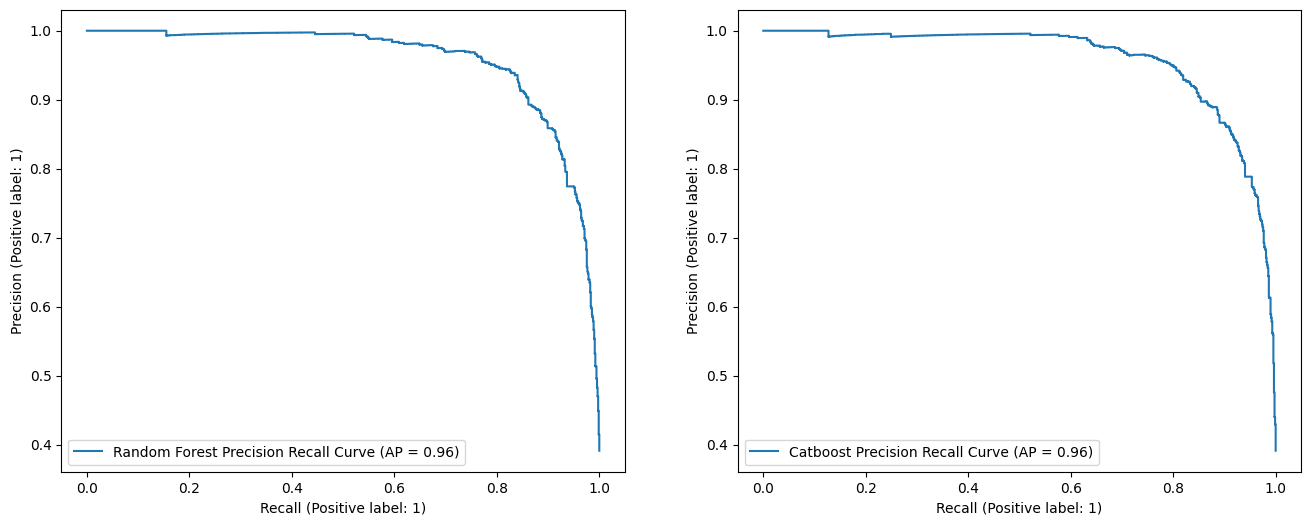

In [71]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(121)
rf_disp = PrecisionRecallDisplay.from_estimator(rf_classif_pipeline, x_test, y_test, ax = ax1, name = 'Random Forest Precision Recall Curve')
ax2 = plt.subplot(122)
cb_disp = PrecisionRecallDisplay.from_estimator(catboost_model, x_test, y_test, ax = ax2, name = 'Catboost Precision Recall Curve')

In [72]:
#Random Forest Algorithm

fpr, tpr, thresh = roc_curve(y_test, rf_test_prob[:, 1])
rf_auc_score = roc_auc_score(y_test, rf_test_prob[:, 1])

In [73]:
#CatBoost Algorithm
c_fpr, c_tpr, c_thresh = roc_curve(y_test, cb_test_prob[:, 1])
cb_auc_score = roc_auc_score(y_test, cb_test_prob[:, 1])

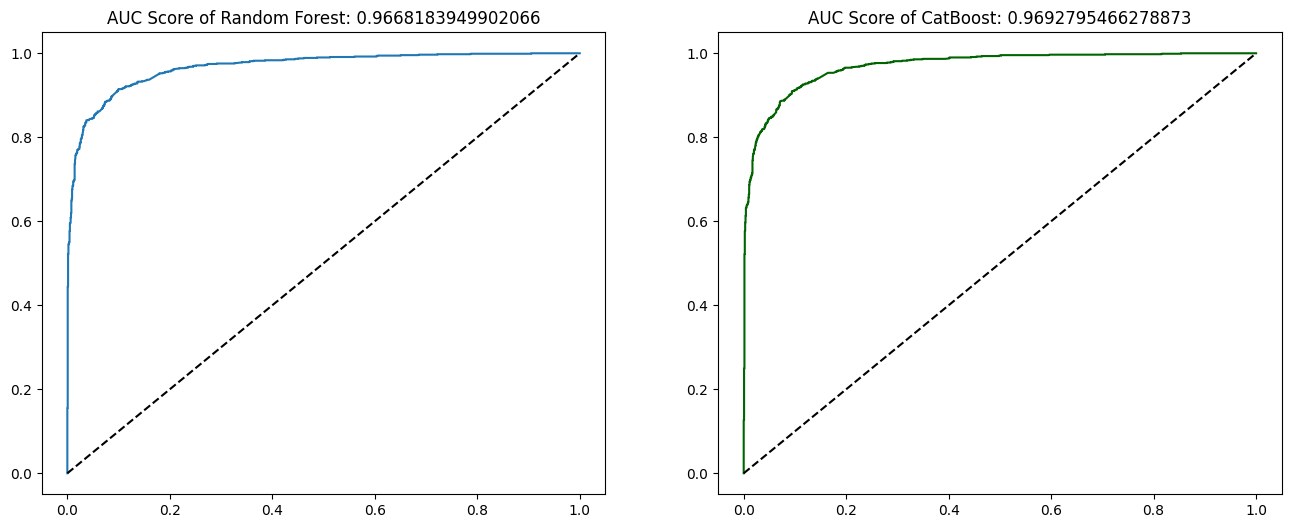

In [74]:
# Plotting ROC/AUC Curve

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(fpr, tpr)
plt.title("AUC Score of Random Forest: %s" %(rf_auc_score))
plt.plot([0,1], [0,1], color = 'k', linestyle = '--')
plt.subplot(122)
plt.plot(c_fpr, c_tpr, color = 'darkgreen')
plt.title("AUC Score of CatBoost: %s" %(cb_auc_score))
plt.plot([0,1], [0,1], color = 'k', linestyle = '--')

### Probability Calibration Plot

In [75]:
rf_y, rf_x = calibration_curve(y_test, rf_test_prob[:, 1], n_bins = 5)
cb_y, cb_x = calibration_curve(y_test, cb_test_prob[:, 1], n_bins = 5)

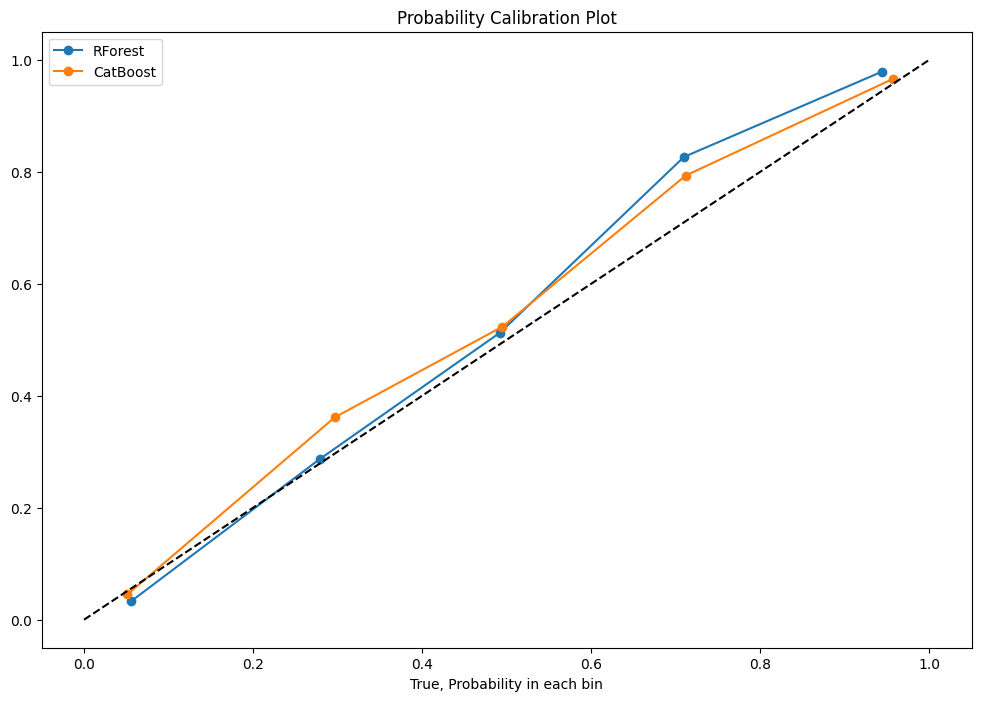

In [76]:
# Probability Calibration Plot

plt.figure(figsize=(12,8))
plt.title("Probability Calibration Plot")
plt.plot(rf_x, rf_y, marker = 'o', label = 'RForest')
plt.plot(cb_x, cb_y, marker = 'o', label = 'CatBoost')
plt.plot([0.0,1.0], [0.0,1.0], color = 'k', linestyle = '--')
plt.xlabel("Predicted Probability")
plt.xlabel("True, Probability in each bin")
plt.legend()

- Calibration Plot Analysis:
  - Random Forest under-predicts probabilities in the first to third bins.
  - CatBoost over-predicts probabilities in the third to fifth bins.
- Calibration adjustments may enhance probability estimation accuracy in both models.

In [77]:
x_train_ct = ct.fit_transform(x_train)
x_test_ct = ct.fit_transform(x_test)

In [78]:
x_train_ct = pd.DataFrame(x_train_ct, columns = x_train.columns)
x_test_ct = pd.DataFrame(x_test_ct, columns = x_test.columns)

In [79]:
rf_model = RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto', bootstrap = False, max_depth = None, random_state = 42)
cb_model = CatBoostClassifier(random_strength=1, learning_rate=0.5, l2_leaf_reg=7, iterations=10, depth=10, border_count=50, silent = True, eval_metric='Accuracy')

In [80]:
rf_sigmoid = CalibratedClassifierCV(base_estimator=rf_model, cv = 5)
rf_iso = CalibratedClassifierCV(base_estimator=rf_model, method = 'isotonic', cv = 5)

In [81]:
cb_sigmoid = CalibratedClassifierCV(base_estimator=cb_model, cv = 5)
cb_iso = CalibratedClassifierCV(base_estimator=cb_model, method = 'isotonic', cv = 5)

In [82]:
rf_sigmoid.fit(x_train_ct, y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=False,
                                                             max_features='auto',
                                                             min_samples_leaf=2,
                                                             min_samples_split=10,
                                                             n_estimators=300,
                                                             random_state=42),
                       cv=5)

In [83]:
rf_sigmoid_prob = rf_sigmoid.predict_proba(x_test_ct)

In [84]:
rf_iso.fit(x_train_ct, y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=False,
                                                             max_features='auto',
                                                             min_samples_leaf=2,
                                                             min_samples_split=10,
                                                             n_estimators=300,
                                                             random_state=42),
                       cv=5, method='isotonic')

In [85]:
rf_iso_prob = rf_iso.predict_proba(x_test_ct)

In [86]:
rf_y, rf_x = calibration_curve(y_test, rf_test_prob[:, 1], n_bins = 5)
rf_sm_y, rf_sm_x = calibration_curve(y_test, rf_sigmoid_prob[:, 1], n_bins = 5)
rf_iso_y, rf_iso_x = calibration_curve(y_test, rf_iso_prob[:, 1], n_bins = 5)

### Random Forest Probability Calibration Plot(Sigmoid/Isotonic/Uncalibrated)

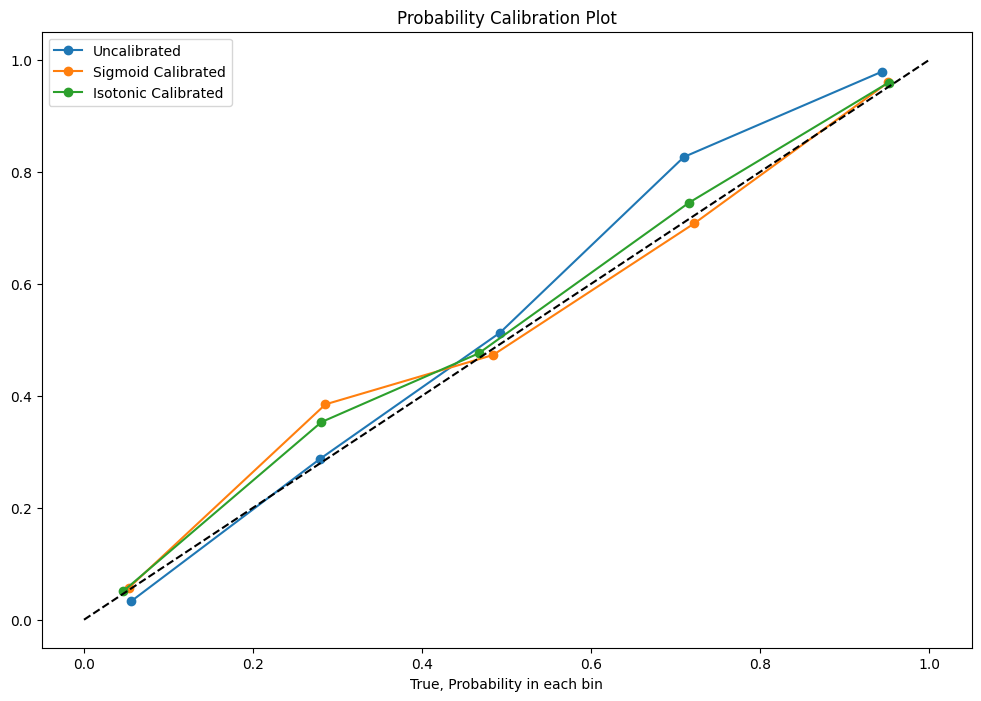

In [88]:
# Probability Calibration Plot

plt.figure(figsize=(12,8))
plt.title("Probability Calibration Plot")
plt.plot(rf_x, rf_y, marker = 'o', label = 'Uncalibrated')
plt.plot(rf_sm_x, rf_sm_y, marker = 'o', label = 'Sigmoid Calibrated')
plt.plot(rf_iso_x, rf_iso_y, marker = 'o', label = 'Isotonic Calibrated')
plt.plot([0.0,1.0], [0.0,1.0], color = 'k', linestyle = '--')
plt.xlabel("Predicted Probability")
plt.xlabel("True, Probability in each bin")
plt.legend()

In [89]:
cb_sigmoid = CalibratedClassifierCV(base_estimator=cb_model, cv = 5)
cb_iso = CalibratedClassifierCV(base_estimator=cb_model, method = 'isotonic', cv = 5)

In [90]:
cb_sigmoid.fit(x_train_ct, y_train)

CalibratedClassifierCV(base_estimator=<catboost.core.CatBoostClassifier object at 0x7cf3f4714640>,
                       cv=5)

In [91]:
cb_sigmoid_prob = cb_sigmoid.predict_proba(x_test_ct)

In [92]:
cb_iso.fit(x_train_ct, y_train)

CalibratedClassifierCV(base_estimator=<catboost.core.CatBoostClassifier object at 0x7cf3f4714640>,
                       cv=5, method='isotonic')

In [93]:
cb_iso_prob = cb_iso.predict_proba(x_test_ct)

In [94]:
cb_y, cb_x = calibration_curve(y_test, cb_test_prob[:, 1], n_bins = 5)
cb_sm_y, cb_sm_x = calibration_curve(y_test, cb_sigmoid_prob[:, 1], n_bins = 5)
cb_iso_y, cb_iso_x = calibration_curve(y_test, cb_iso_prob[:, 1], n_bins = 5)

### CatBost Probability Calibration Plot -  (Sigmoid/Isotonic/Uncalibrated)

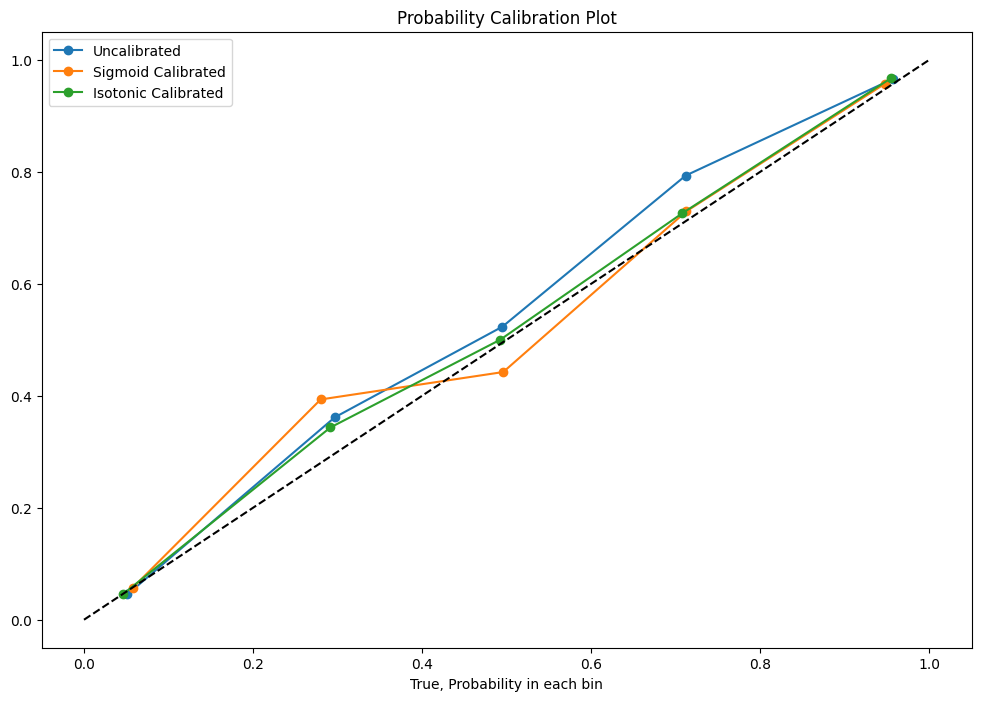

In [95]:
# Probability Calibration Plot

plt.figure(figsize=(12,8))
plt.title("Probability Calibration Plot")
plt.plot(cb_x, cb_y, marker = 'o', label = 'Uncalibrated')
plt.plot(cb_sm_x, cb_sm_y, marker = 'o', label = 'Sigmoid Calibrated')
plt.plot(cb_iso_x, cb_iso_y, marker = 'o', label = 'Isotonic Calibrated')
plt.plot([0.0,1.0], [0.0,1.0], color = 'k', linestyle = '--')
plt.xlabel("Predicted Probability")
plt.xlabel("True, Probability in each bin")
plt.legend()

- **Probability Calibration Benefits:**
  - Enhances model performance, particularly useful in imbalance datasets.
  - Complements AUC/ROC for comprehensive model diagnosis and improvement.
  